# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-x-PYcds3K7ck8ELQyVlVoN&si=ZCdvUB2r4dQ7cnQx >}}

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

ref: <https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview>

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

2023-12-01 22:24:10,010 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff5450cc250>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/data/download-all/house-prices-advanced-regression-techniques
2023-12-01 22:24:30,028 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff545062020>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/data/download-all/house-prices-advanced-regression-techniques
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 835kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 833kB/s]


In [5]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
df_submission = pd.read_csv("sample_submission.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [13]:
!rm sample_submission.csv
!rm train.csv
!rm test.csv
!rm data_description.txt
!rm house-prices-advanced-regression-techniques.zip

# 4. 적합 

In [18]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [21]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='SalePrice')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_132915/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_132915/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.13 GB / 490.57 GB (50.6%)
Train Data Rows:    1460
Train Data Columns: 80
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting

[1000]	valid_set's rmse: 27505.1
[2000]	valid_set's rmse: 27240.4
[3000]	valid_set's rmse: 27201.5
[4000]	valid_set's rmse: 27197.3
[5000]	valid_set's rmse: 27197.2


	-27196.7065	 = Validation score   (-root_mean_squared_error)
	2.72s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29499.8
[2000]	valid_set's rmse: 28896.4
[3000]	valid_set's rmse: 28752.1
[4000]	valid_set's rmse: 28705.7
[5000]	valid_set's rmse: 28695.2
[6000]	valid_set's rmse: 28693
[7000]	valid_set's rmse: 28692.5
[8000]	valid_set's rmse: 28692.3
[9000]	valid_set's rmse: 28692.3
[10000]	valid_set's rmse: 28692.3


	-28692.2871	 = Validation score   (-root_mean_squared_error)
	5.95s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32785.3519	 = Validation score   (-root_mean_squared_error)
	0.44s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-28465.6966	 = Validation score   (-root_mean_squared_error)
	50.09s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-32045.9062	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-33846.1203	 = Validation score   (-root_mean_squared_error)
	3.1s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-27778.2437	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-35786.956	 = Validation score   (-root_mean_squared_error)
	6.1s	 = Training   runtime


[1000]	valid_set's rmse: 32134.9
[2000]	valid_set's rmse: 32087.8
[3000]	valid_set's rmse: 32084.2
[4000]	valid_set's rmse: 32084.2
[5000]	valid_set's rmse: 32084.2


	-32084.1712	 = Validation score   (-root_mean_squared_error)
	9.08s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-26322.571	 = Validation score   (-root_mean_squared_error)
	0.21s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 80.78s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20231201_132915/")


# 5. 제출 

In [26]:
df_submission['SalePrice'] = yyhat 
df_submission.to_csv("submission.csv",index=False)

In [27]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "오토글루온을 이용하여 첫제출"
!rm submission.csv

  0%|                                               | 0.00/21.1k [00:00<?, ?B/s]2023-12-01 22:35:47,374 WARNING Retrying (Retry(total=9, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fab8d916500>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /upload/storage/v1/b/kaggle-competitions-submissions/o?uploadType=resumable&upload_id=ABPtcPrQPMZgrOes6mIirhgo1brnKPVPDPdDAa0UrFknmizjXgeg2BBIaNtyZYx7a5ZMz70lq_iPJQj-hoNcwHQjzA7_ajRVGka6C29N5aBKnRKBGg
100%|████████████████████████████████████████| 21.1k/21.1k [00:26<00:00, 821B/s]
Successfully submitted to House Prices - Advanced Regression Techniques

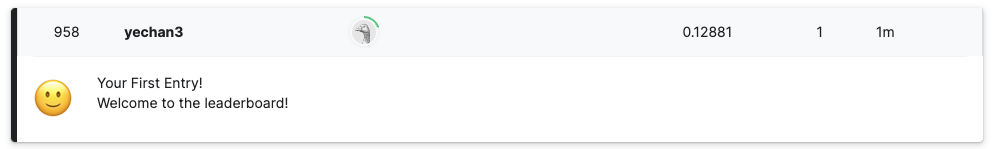

In [15]:
958/4955

0.19334006054490413

나쁘지 않은 순위.. 

# 6. 해석 및 시각화 (HW)

`-` 변수들중에서 `SalePrice`를 예측하기에 적절한 변수들을 조사해볼것. 